## Monte Carlo Techniques

### Generating pseudorandom numbers:

Computers run algorithms and algorithms no matter how convoluted, are deterministic. Thus a computer is incapable of generating actual random numbers. The best one can do, is generate "pseudorandom" numbers. As it turns out, fortunately, these pseudorandom numbers suffice in most, if not all of the cases where we require actual random numbers.

A very straightforward (though not very resilient or reliable) algorithm through which one can generate pseudorandom numbers is known as the "Linear Congruent Method".

#### Linear Congruent Method

The linear congruent method is used to generate a sequence of random numbers. It works  as follows: you first provide an initial "seed" value (as with all pseudorandom number generators). Let us call this seed value $s_1$. You now take this number, scale it by some constant factor $a$ and add to it another constant $c$. You then write this number mod N (that is the remainder you get when you divide this number by N). In other words:


$$\begin{align*} s_{i+1} &= \text{Remainder}\bigg(\frac{as_i + c}{N}\bigg) \\ \\s_{i+1} &= as_i + c \space \space \text{mod} \space N \end{align*}$$

This generates a sequence of N random nummbers (after which the sequence starts repeating and is no longer random due to the presence of correlations). One might therefore conclude that in order to generate long lists of pseudorandom numbers, one needs to use large values of N.

#### Random Sequence Implementation

We first write a simple python program that generates random numbers using the linear congruent method (we will henceforth call all pseudrandom numbers random). Here is the implementation:

In [27]:
import numpy as np

a = 57           #The multiplicative factor
c = 1            #The additive factor
N = 256          #The size of the final pseudorandom sequence 
s = 10           #The initial seed value

def LinearCongruent(seed,entries):
    current = seed
    final = np.zeros(entries)
    for i in range(entries):
        final[i] = current
        current = (current*a + c)%N
        
    return final
        
#print(LinearCongruent(s,1000))

Notice that the period (or the number of entries before the sequence starts repeating is exactly equal to the number N, as one would expect). Even then, we can check this explicitly using:

In [4]:
sequence = LinearCongruent(s,1000)
i = 100
print(sequence[i])
print(sequence[i + N])

254.0
254.0


Try using any value of i (within N of the array size of course) and you will see that this holds true for all entries. Once the function has generated N entries, correlations start appearing and the sequence is no longer random.

#### Eyeballing patterns:

Let us now plot successive points ($r_{i}$,$r_{i+1}$) on the cartesian grid and see if there appear to be any patterns at play in this supposedly random sequence of numbers:

Text(0, 0.5, '$r_i$')

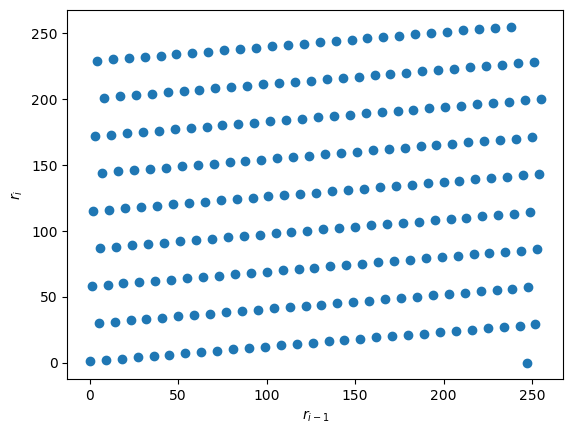

In [5]:
import matplotlib.pyplot as plt

x = LinearCongruent(s,N)
y = np.zeros(N)

for i in range(N-1):
    y[i] = x[i+1]
    
y[N-1] = x[0]
    
plt.scatter(x,y)
plt.xlabel("$r_{i-1}$")
plt.ylabel("$r_i$")

Another way of gauging the so called "randomness" of a sequence is to plot each random number against its index (i.e the number at which it appears in the sequence). Let us make such a plot ourselves:

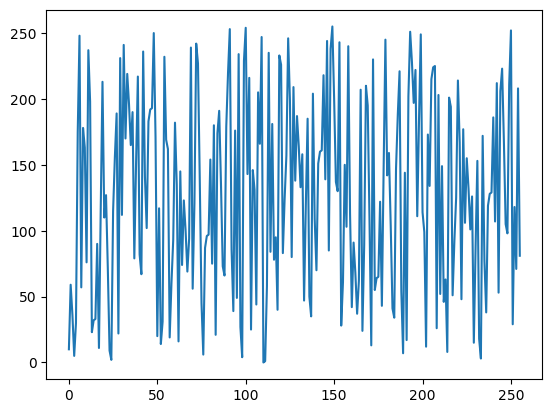

In [7]:
indices = list(range(N))

plt.plot(indices,x)

Let us now apply these "randomness tests" on the default random number generator built into Python (Also knows as the Mersenne Twister). To do so let us first generate N random numbers by doing N trials:

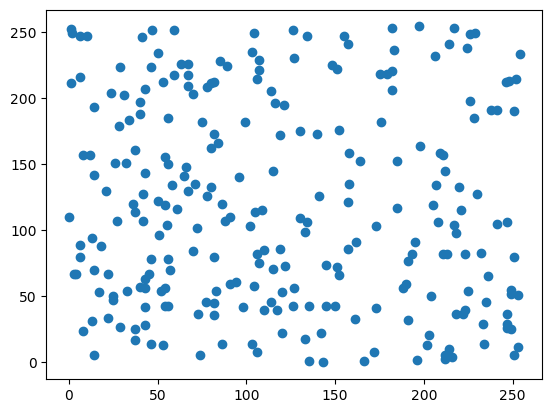

In [20]:
import random

twister_sequence = np.zeros(N)
twister_sequence_shifted = np.zeros(N)

for i in range(N):
    twister_sequence[i] = random.randrange(0,N,1)
    
for i in range(N-1):
    twister_sequence_shifted[i] = twister_sequence[i+1]
    
twister_sequence_shifted[N-1] = twister_sequence[0]
    
plt.scatter(twister_sequence, twister_sequence_shifted)


This evidently looks way more random than the sequence we generated using the linear congruent method (succeeding terms are not very correlated with eachother, which points towards the absence of a pattern).
Let us now try using the linear congruent method with a set of "reasonable" constants (say for example large N and a):

Text(0, 0.5, '$r_i$')

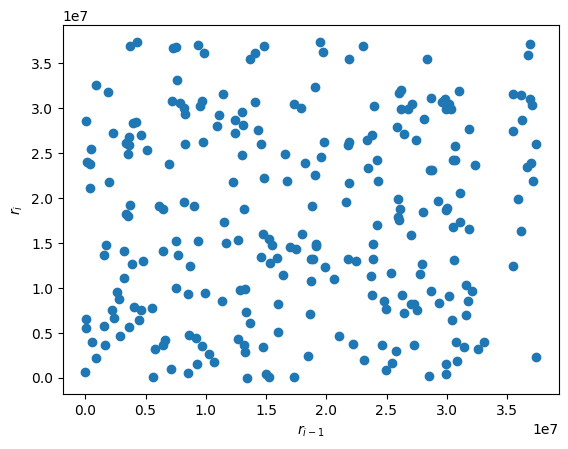

In [25]:
a = 56793          
c = 37          
N = 37459397      
s = 10
limit = 256

x = LinearCongruent(s,limit)
y = np.zeros(limit)

for i in range(limit-1):
    y[i] = x[i+1]
    
y[limit-1] = x[0]
    
plt.scatter(x,y)
plt.xlabel("$r_{i-1}$")
plt.ylabel("$r_i$")

Voila! This too seems just as random as our Mersenne Twister!

### Simulating a random walk:

Random walks are physically important, in that they can be used to simulate brownian motion in the limit that the step size goes to zero. Aside from this special case, they are interesting in their own right. Let us analyze the statistics of a 2-Dimensional Random Walk and then simulate it using Python.

To start with, we assume that the particle undergoing the random walk takes a step in some random direction at each instant. Let us denote this step as a vector distance covered in the x and y directions:

$$(\Delta x_i , \Delta y_i)$$

Where i denotes the step number. Then a particle undergoing a random walk of N steps covers N such vector distances. If we were to look at the outcome of such a random walk we could characterize it by the final vector position of the particle $R$. In our case we are concerned with $R^2$ because as we will see, the average of this vector $R$ actually disappears for a large number of trials which intuitively makes sense. On the other hand, the average of $R^2$ does not (note that R^2 is ofcourse a scalar):

$$\begin{align*} R^2 &= (\Delta x_1 + \Delta x_2 + \Delta x_3 + ... + \Delta x_N )^2 + (\Delta y_1 + \Delta y_2 + \Delta y_3 + ... + \Delta y_N )^2  \\ &= \Delta x_1^2 + \Delta x_2^2 + ... + \Delta x_N^2 + 2\Delta x_1 \Delta x_2 +  2\Delta x_1 \Delta x_3 +  2\Delta x_2 \Delta x_1 + ... + \Delta y_1^2 + \Delta y_2^2 + ... + \Delta y_N^2 + 2\Delta y_1 \Delta y_2 +  2\Delta y_1 \Delta y_3 +  2\Delta y_2 \Delta y_1 + ...\end{align*}$$

The cross terms seem problematic. But here's a neat trick. If you take the average on both sides, then for large enough N these cross terms (being random numbers with arbitrary sign) are going to effectively cancel eachother and all that will be left are the neat little squared terms. In other words if we define:

$$\langle R^2 \rangle = R_{\text{rms}}^2$$

Then we can say:

$$ \begin{align}R_{\text{rms}}^2 &\approx \langle \Delta x_1^2 + \Delta x_2^2 + ... + \Delta x_N^2 + \Delta y_1^2 + \Delta y_2^2 + ... + \Delta y_N^2 \rangle \\ &= \langle \Delta x_1^2 + \Delta y_1^2 \rangle + \langle \Delta x_2^2 + \Delta y_2^2 \rangle + ... + \langle \Delta x_N^2 + \Delta y_N^2 \rangle \\ &= N r_{\text{rms}}^2 \end{align}$$

Where we have defined $r_{\text{rms}}$ to be the root mean squared step size. Then taking the square root on both sides we can write:

$$\boxed{R_{\text{rms}} \approx \sqrt{N} r_{\text{rms}}}$$

Evidently the root mean squared distance from the origin of the particle after N steps goes as the _square root of N times the step size_ as opposed to N times the step size that one would expect for a particle taking N steps in one direction. Something is evidently lost in the two-dimensionality of the situation.

#### Random Walk Implementation

Let us implement the 2D random walk in Python.

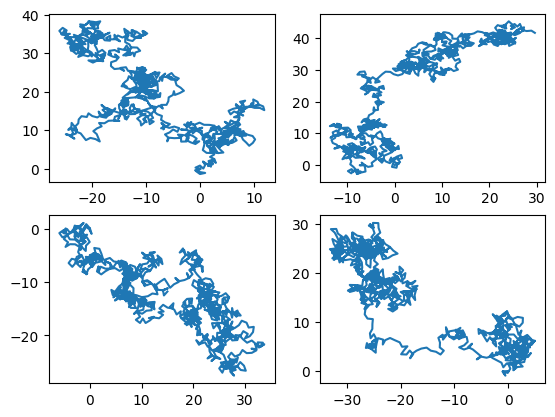

In [75]:
def RandomWalk(stepnumber):
    x_pos = 0
    y_pos = 0
    tuple_list = list()
    for i in range(stepnumber):
        x_step = random.uniform(-1,1)
        y_step = random.uniform(-1,1)
        norm = np.sqrt(x_step**2 + y_step**2)
        x_norm = x_step/norm
        y_norm = y_step/norm
        tuple_list.append((x_pos,y_pos))
        x_pos += x_norm
        y_pos += y_norm
        
    return tuple_list

random.uniform(-1,1)
result1 = RandomWalk(1000)
random.seed(98835734)
result2 = RandomWalk(1000)
random.seed(48332)
result3 = RandomWalk(1000)
random.seed(753837)
result4 = RandomWalk(1000)

xs1, ys1 = zip(*result1)
xs2, ys2 = zip(*result2)
xs3, ys3 = zip(*result3)
xs4, ys4 = zip(*result4)

plt.figure(1)
plt.subplot(221)
plt.plot(xs1,ys1)
plt.subplot(222)
plt.plot(xs2,ys2)
plt.subplot(223)
plt.plot(xs3,ys3)
plt.subplot(224)
plt.plot(xs4,ys4)

These are four of our sample 2D random walks. Just eyeballing, they do look random. 

Let us now calculate the average of the distance $R$ over many trials. To do this we must run our simulation multiple times, ofcourse, calling it again and again would be cumbersome. So lets use a loop: 

In [ ]:
def RSquared(stepnumber):
    x_pos = 0
    y_pos = 0
    tuple_list = list()
    for i in range(stepnumber):
        x_step = random.uniform(-1,1)
        y_step = random.uniform(-1,1)
        norm = np.sqrt(x_step**2 + y_step**2)
        x_norm = x_step/norm
        y_norm = y_step/norm
        tuple_list.append((x_pos,y_pos))
        x_pos += x_norm
        y_pos += y_norm
        
    return tuple_list

walk_list = list()
for i in range(50):
    random.seed(i*354 + 60)
    walk_list.append(RandomWalk(1000))